In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('instagram_reach.csv')

In [3]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [4]:
df.shape

(100, 8)

In [5]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop(columns=['Unnamed: 0','S.No'],axis=1,inplace=True)

In [8]:
df.describe()

,Followers,Likes
count,94.000000,94.000000
mean,942.627660,47.882979
std,1023.894946,56.501757
min,11.000000,8.000000
25%,231.000000,19.000000
50%,593.500000,29.500000
75%,1177.000000,46.000000
max,4496.000000,349.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


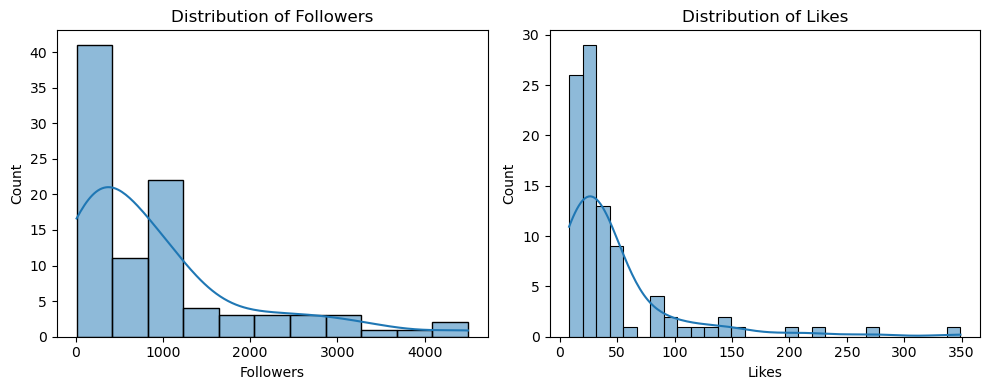

In [9]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Followers', kde=True)
plt.title('Distribution of Followers')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Likes', kde=True)
plt.title('Distribution of Likes')

plt.tight_layout()
plt.show()


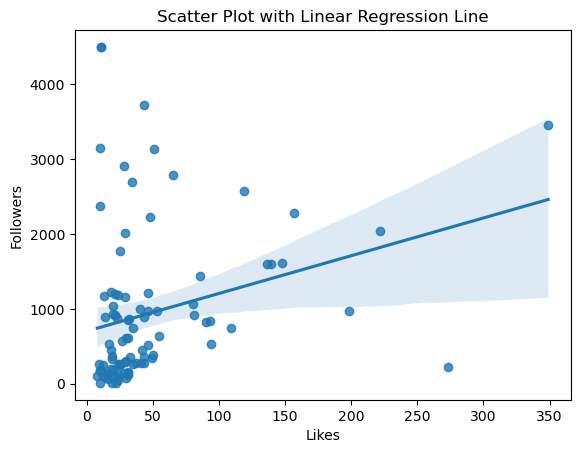

In [10]:
sns.regplot(x='Likes', y='Followers', data=df)
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Likes')
plt.ylabel('Followers')

plt.show()


In [25]:
df['Time since posted'].nunique()

11

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U8'), dtype('float64')) -> None

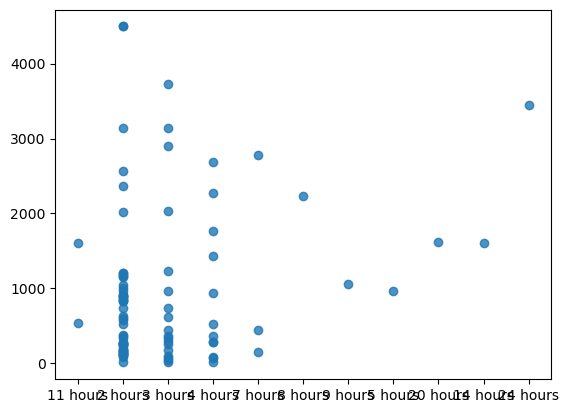

In [22]:
sns.regplot(x='Time since posted', y='Followers', data=df)
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Likes')
plt.ylabel('Followers')

plt.show()

In [11]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [12]:
# Split Target and Independent Variable
X = df[['USERNAME', 'Caption', 'Followers', 'Hashtags']]
y_time_since_posted = df['Time since posted']
y_likes=df['Likes']

In [13]:
#Train_test_split
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_time_since_posted_train, y_time_since_posted_test, y_likes_train, y_likes_test = train_test_split(
    X, y_time_since_posted, y_likes, test_size=0.3, random_state=73)

In [15]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)

X_train Shape: (65, 4)
X_test Shape: (29, 4)


In [16]:
print('time_since_posted_train',y_time_since_posted_train.shape)
print('time_since_posted_test',y_time_since_posted_test.shape)

time_since_posted_train (65,)
time_since_posted_test (29,)


In [17]:
print('likes_train: ', y_likes_train.shape)
print('likes_test: ', y_likes_test.shape)

likes_train:  (65,)
likes_test:  (29,)


# Categorical to Numerical

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [20]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

C:\Users\miqba\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
